<a href="https://colab.research.google.com/github/bustanularifin666/MachineLearningTasks/blob/main/MidTermTask/UTS_ML_K_Means_Japanese_man_height_and_weight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Muhammad Bustanul Arifin Nur Fathurrahman
* 1103228224
* K-Means Clustering
[Japanese Man Height and Weight](https://www.kaggle.com/datasets/risakashiwabara/jpmean-and-standard-deviation-of-height-and-weight/data)


Import library yang akan digunakan terlebih dahulu

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from google.colab import drive
import pandas as pd
import seaborn as sns
import numpy as np

Hubungkan google colab dengan google drive untuk mengakses dataset yang telah disimpan di google drive

Prompt chatGPT : beri kode untuk menghubungkan google colab dengan google drive dan membaca dataset dan mengubah dataset sebagai dataframe

In [ ]:
#mount google drive agar terhubung dengan google colab
drive.mount('/content/drive')

#Masukkan direktori file dataset yang ingin diupload
file_path1 = '/content/drive/My Drive/Dataset/man.csv'
df_man = pd.read_csv(file_path1)

Mounted at /content/drive


# EDA

PROMPT ChatGPT: Apa itu EDA ?

EDA (Exploratory Data Analysis) adalah suatu pendekatan atau proses analisis data yang digunakan untuk menganalisis dan memahami dataset sebelum melakukan pemodelan atau analisis statistik yang lebih mendalam. Tujuan utama dari EDA adalah untuk mengidentifikasi pola-pola dalam data, menemukan hubungan antar variabel, dan mendapatkan wawasan awal tentang karakteristik dataset.

Beberapa kegiatan yang umum dilakukan dalam EDA melibatkan:


1.   Statistik Deskriptif, Melihat ringkasan statistik untuk memahami karakteristik sentral dan variasi dalam data.
2.   Visualisasi Data, Visualisasi membantu dalam pemahaman distribusi data dan pola-pola yang mungkin tersembunyi.
3.   Pencarian dan Penanganan Nilai Tidak Lengkap, Mengidentifikasi dan menangani nilai yang hilang atau tidak lengkap untuk memastikan keakuratan analisis.
4. Pemahaman Distribusi dan Pola, Menilai distribusi atribut, mencari tahu apakah data memiliki kecondongan (skewness) atau adanya pencilan (outliers).
5. Analisis Korelasi, Menilai hubungan antara variabel-variabel untuk melihat apakah ada korelasi atau asosiasi di antara mereka.
6. Penanganan Variabel Kategorikal, Jika dataset memiliki variabel kategorikal, EDA dapat melibatkan analisis distribusi kategori dan pengaruhnya terhadap variabel lain.
7. Segmentasi dan Pemisahan Data, Memahami bagaimana data dapat dibagi atau dikelompokkan berdasarkan karakteristik tertentu.

EDA merupakan langkah awal dalam proses analisis data dan membantu peneliti atau analis data untuk membentuk pertanyaan-pertanyaan lebih lanjut, mengidentifikasi pola-pola menarik, dan merencanakan langkah-langkah selanjutnya dalam analisis data.

In [ ]:
# Lakukan pengecekan dataset dengan menampilkan 5 data pertama
df_man.head()

,year,category,height_average,height_standard deviation,body weight _average,body weight _standard deviation
0,5,national,111.0,4.87,19.3,2.79
1,5,Hokkaido,111.3,4.81,19.3,2.83
2,5,Aomori,111.8,4.87,19.9,2.78
3,5,Iwate,111.0,5.08,19.6,3.02
4,5,Miyagi,111.3,4.90,19.7,3.04


Kita akan menggunakan atribut age, average_weight, dan average_height saja. Hapus kolom yang tidak dibutuhkan, yaitu height_standard deviation, category, dan body weight _standard deviation


PROMPT ChatGPT:
Beri kode untuk menghapus kolom:
height_standard deviation, category dan body weight _standard deviation
pada dataframe saya yang bernama df_man

In [ ]:
# Menghapus kolom pada df_man
df_man.drop(['height_standard deviation', 'body weight _standard deviation', 'category'], axis=1, inplace=True)

PROMPT ChatGPT:
"Dataframe yang saya miliki bernama df_man, dan memiliki nama-nama atribut/kolom sebagai berikut: year, height_average dan body weight _average.
Beri kode untuk mengubah nama atribut: year, body weight _average menjadi: age dan weight_average


In [ ]:
# Mengubah nama kolom pada df_man
df_man.rename(columns={'year': 'age', 'body weight _average': 'weight_average'}, inplace=True)

In [ ]:
# Lakukan pengecekan ada atribut apa saja dengan tipe apa saja yang ada pada dataset
df_man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             624 non-null    int64  
 1   height_average  624 non-null    float64
 2   weight_average  624 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 14.8 KB


Dapat dilihat bahwa dataset memiliki index data sebanyak 624 data dengan 6 kolom. 1 kolom dengan tipe data int, 1 kolom dengan tipe object, dan 4 kolom dengan tipe data float

In [ ]:
# mengecek apakah ada nilai 0 pada df_man
df_man.describe()

,age,height_average,weight_average
count,624.000000,624.000000,624.000000
mean,11.000000,145.072917,40.986218
std,3.744659,20.507207,14.991854
min,5.000000,110.000000,18.900000
25%,8.000000,128.000000,27.400000
50%,11.000000,145.900000,39.650000
75%,14.000000,166.000000,55.225000
max,17.000000,171.900000,65.900000


Dari data diatas, dapat dilihat tidak ada atribut yang memiliki nilai min = 0

Lakukan visualisasi data yang ada

PROMPT ChatGPT:
berikan kode untuk visualisasi histogram pada dataframe "df_man" dengan kolom "height_average" dan "weight_average"

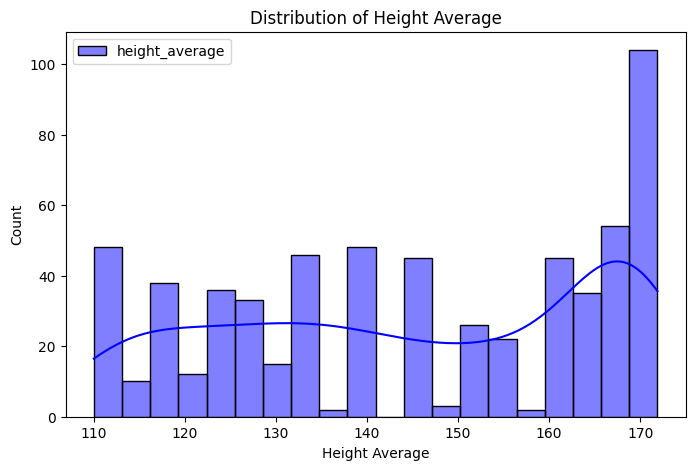

In [ ]:
# Visualisasi histogram Height Average
plt.figure(figsize=(8, 5))
sns.histplot(df_man['height_average'], bins=20, kde=True, color='blue', label='height_average') # memplotting berapa banyak data pada height average sesuai dengan nilainya dari df_man
plt.title('Distribution of Height Average')
plt.xlabel('Height Average')
plt.ylabel('Count')
plt.legend()
plt.show()

Dari histogram diatas dapat dilihat bahwa Height Average (tinggi rata-rata) orang Jepang paling banyak memiliki tinggi badan sekitar 170 cm Sebanyak lebih dari 100 orang

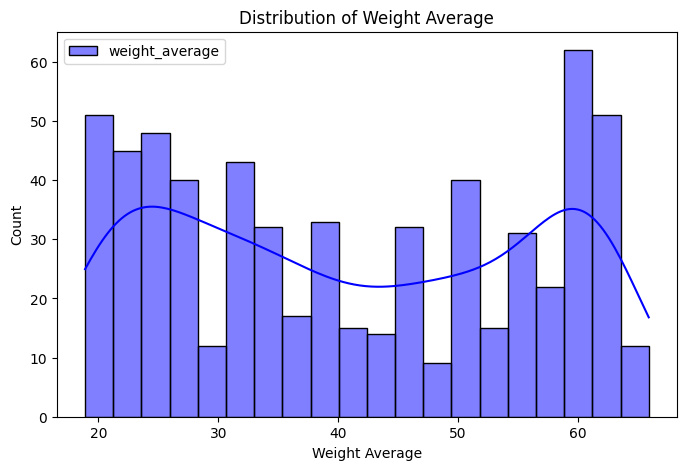

In [ ]:
# Visualisasi histogram Weight Average
plt.figure(figsize=(8, 5))
sns.histplot(df_man['weight_average'], bins=20, kde=True, color='blue', label='weight_average')
plt.title('Distribution of Weight Average')
plt.xlabel('Weight Average')
plt.ylabel('Count')
plt.legend()
plt.show()

Selain itu dapat dilihat juga bahwa Weight Average (berat badan rata-rata) orang Jepang paling banyak memiliki berat badan sekitar 60 kg sebanyak lebih dari 60 orang

Lakukan visualisasi scatter plot data untuk melihat pola data x terhadap data y

PROMPT ChatGPT:
berikan kode untuk visualisasi scatter plot pada dataframe "df_man" atribut "weight_average" dengan "height_average" berdasarkan atribut "age"

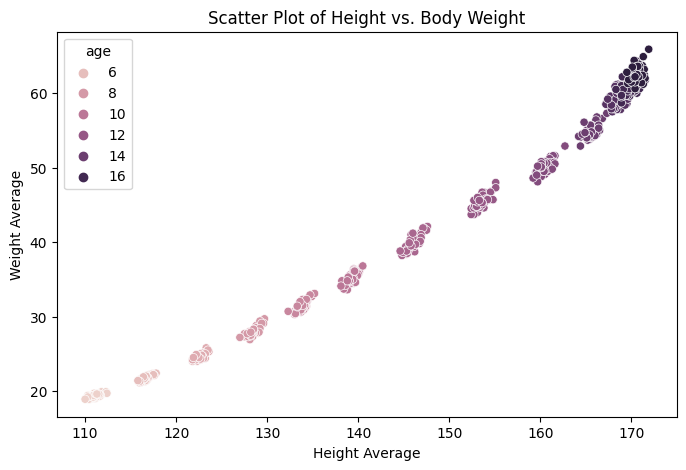

In [ ]:
# Visualisasi diagram pencar height terhadap weight dan dikelompokkan berdasarkan age
plt.figure(figsize=(8, 5))
sns.scatterplot(x='height_average', y='weight_average', data=df_man, hue='age') # plotting scatterplot antara atribut height dengan weight dan dikelompokkan berdasarkan age
plt.title('Scatter Plot of Height vs. Body Weight')
plt.xlabel('Height Average')
plt.ylabel('Weight Average')
plt.show()

Dari scatter plot diatas dapat dilihat semakin bertambah tua umur, semakin tinggi serta semakin bertambah berat juga orang Jepang

Mencari korelasi antar kolom yang age, height_average, dan weight_average

PROMPT ChatGPT: beri kode untuk mencari korelasi antara kolom 'age', 'height_average', dan 'weight_average' pada df_man

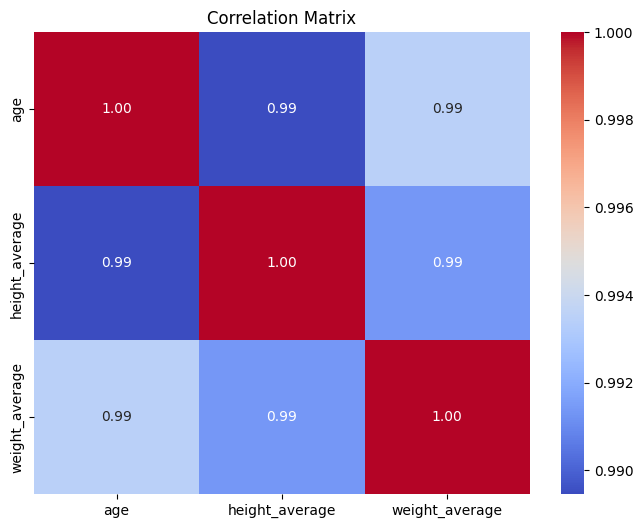

                     age  height_average  weight_average
age             1.000000        0.989454        0.993480
height_average  0.989454        1.000000        0.991383
weight_average  0.993480        0.991383        1.000000


In [ ]:
# Menghitung korelasi antar atribut
correlation_matrix = df_man[['age', 'height_average', 'weight_average']].corr()

# Visualisasi matriks korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
print(correlation_matrix)

Dengan semua kolom memiliki nilai korelasi yang mendekati 1 atau -1, maka tidak ada kolom yang perlu dihapus

# Training Data

Tahap training pada algoritma K-Means melibatkan penentuan pusat cluster dan penetapan setiap titik data ke dalam salah satu cluster berdasarkan kedekatan dengan pusat cluster. Berikut adalah tahap-tahap umum dalam proses training K-Means:

1. Inisialisasi Pusat Cluster:
* Pilih secara acak K titik data sebagai pusat cluster awal. K merupakan jumlah cluster yang diinginkan.
* Alternatif inisialisasi dapat menggunakan metode khusus seperti K-Means++ untuk meningkatkan konvergensi algoritma.
2. Penetapan Titik Data ke dalam Cluster:

* Hitung jarak antara setiap titik data dengan pusat cluster.
* Tentukan setiap titik data ke dalam cluster dengan pusat terdekat.
* Titik-titik data dikelompokkan berdasarkan pusat cluster terdekat.
3. Perbaruan Pusat Cluster:

* Hitung rata-rata (mean) dari setiap kelompok (cluster) untuk mendapatkan pusat baru.
* Pusat baru akan menjadi pusat cluster pada iterasi berikutnya.
4. Iterasi:

* Ulangi langkah 2 dan 3 hingga kondisi berhenti terpenuhi. Kondisi berhenti dapat berupa jumlah iterasi maksimum atau konvergensi algoritma (ketika pusat cluster tidak berubah secara signifikan antara iterasi).
5. Hasil Akhir:

* Setelah iterasi selesai, setiap titik data telah ditetapkan ke dalam satu cluster.
* Pusat cluster dan pengelompokan (label) dapat digunakan untuk analisis lebih lanjut atau prediksi pada data baru.

Elbow method digunakan untuk membantu menentukan jumlah cluster yang optimal dalam algoritma K-Means.

PROMPT ChatGPT:
Beri kode untuk memvisualisasikan elbow method dengan maksimal jumlah k=10 pada dataframe bernama df_man, dan nama columns 'age', 'weight_avergae', 'height_avergae',

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

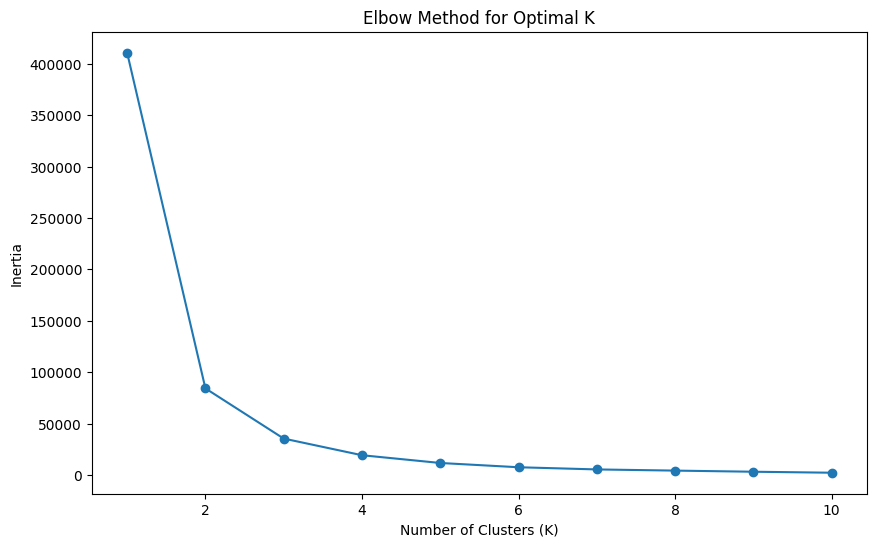

In [ ]:
# Memilih kolom-kolom yang akan digunakan
features = ['age', 'height_average', 'weight_average']

# Memisahkan fitur untuk analisis elbow method
X = df_man[features]

# Menghitung inersia (within-cluster sum of squares) untuk setiap nilai k
inertia = []
max_clusters = 10

for k in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Memvisualisasikan elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters+1), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

Pada elbow method, untuk memilih jumlah cluster yang ideal adalah dengan melihat penurunan inersia yang mulai melambat secara signifikan.
Pada grafik diatas, penurunan inersia mulai melambat pada jumlah kluster 4 sehingga akan digunakan 4 buah kluster

Lakukan visualisasi data dengan K-Means clustering

PROMPT ChatGPT:
dengan dataframe bernama df_man, beri kode untuk membuat model k means clustering yang berisi atribut 'age', 'weight_avergae', 'height_avergae'; jumlah cluster=4; dan beri kolom baru bernama label dan visualisasikan berdasarkan label dan tampilkan juga centroidsnya

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Centroids:
[[ 11.99300699 153.22657343  44.99090909]
 [  6.         116.75347222  21.85972222]
 [ 15.48704663 168.57668394  59.3984456 ]
 [  9.         133.79375     31.45833333]]


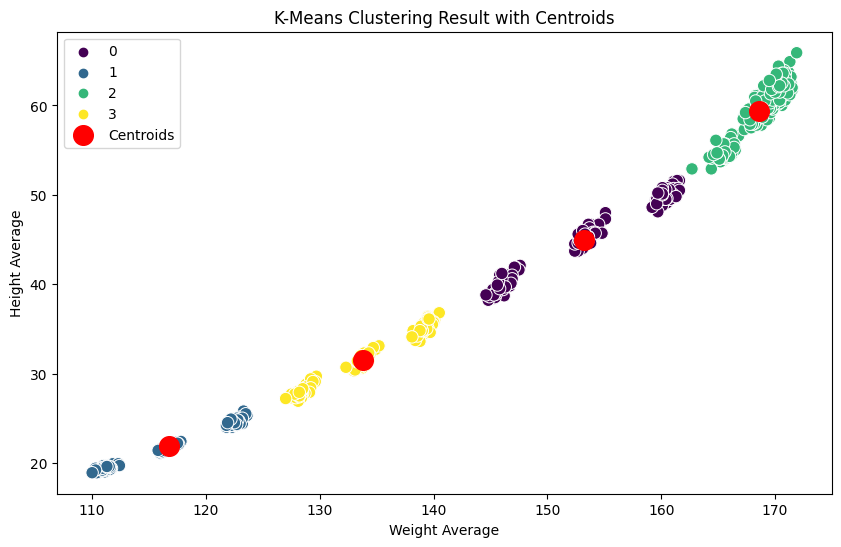

In [ ]:
# Memilih jumlah cluster
n_clusters = 4

# Memisahkan fitur untuk clustering
X = df_man[features]

# Membuat dan melatih model K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_man['label'] = kmeans.fit_predict(X)

# Menampilkan pusat cluster (centroids)
centroids = kmeans.cluster_centers_
print("Centroids:")
print(centroids)

# Menampilkan visualisasi hasil clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_man, x='height_average', y='weight_average', hue='label', palette='viridis', s=80)
plt.scatter(centroids[:, 1], centroids[:, 2], c='red', s=200, label='Centroids')  # Pusat cluster
plt.title('K-Means Clustering Result with Centroids')
plt.xlabel('Weight Average')
plt.ylabel('Height Average')
plt.legend()
plt.show()

Pada clustering data diatas dapat dilihat 4 kluster yang telah dibagi dengan titik centroids sebagai pusat dari klusternya.
Pada kluster 2 terdapat satu buah data yang tetangganya lebih dekat dengan 0  daripada dari kluster yang sama

# Evaluation

Evaluasi clustering pada algoritma K-Means umumnya melibatkan penggunaan metrik evaluasi yang mengukur sejauh apa hasil clustering sesuai dengan ekspektasi atau kriteria tertentu. Beberapa metrik evaluasi umum untuk K-Means antara lain:


1. Silhouette Score
*   Mengukur sejauh apa setiap titik data dalam suatu cluster mirip dengan titik-titik di dalam cluster lain.
*   Nilai silhouette score berkisar antara -1 hingga 1, di mana nilai lebih tinggi menunjukkan clustering yang lebih baik.
Berguna untuk mengevaluasi seberapa baik objek ditempatkan dalam cluster mereka dan seberapa baik cluster tersebut terpisah.



PROMPT ChatGPT:
Beri kode untuk menghitung nilai sillhouette score untuk k=2 hingga k=15

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

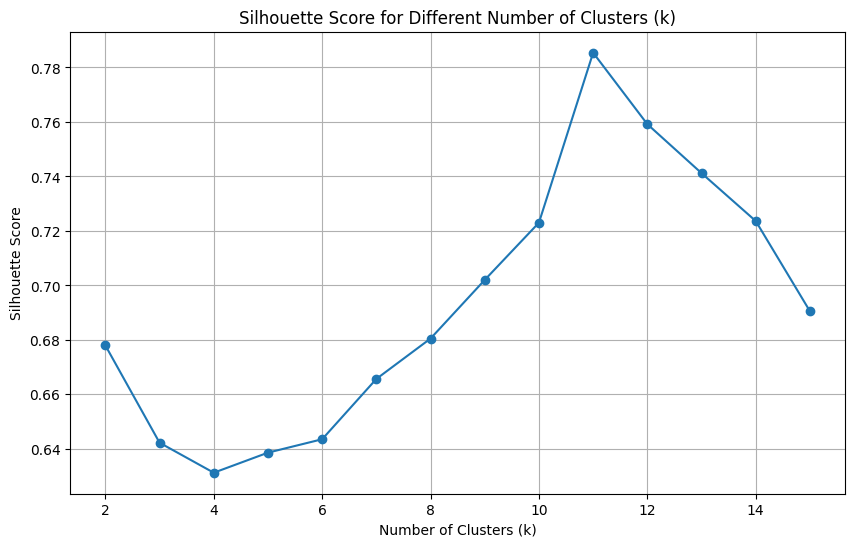

In [ ]:
from sklearn.metrics import silhouette_score
# Memilih jumlah cluster yang akan diuji
k_values = list(range(2, 16))

# Memisahkan fitur untuk clustering
X = df_man[features]

# Menghitung silhouette score untuk setiap nilai k
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

# Memvisualisasikan hasil silhouette score
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

Dari grafik diatas dapat dilihat kluster yang paling baik adalah dengan jumlah kluster sebanyak 11 kluster, karena memiliki nilai yang paling mendekati 1

2. Davies-Bouldin Index:
*   Mengukur seberapa baik cluster terbentuk, dengan nilai yang lebih rendah
menunjukkan clustering yang lebih baik.
* Menyajikan rasio antara penyebaran dalam suatu cluster dengan penyebaran antara cluster.
* Nilai terendah menunjukkan cluster yang lebih homogen dan terpisah.

PROMPT ChatGPT:
Beri kode untuk menghitung nilai Davies Bouldin Index score untuk k=2 hingga k=15

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

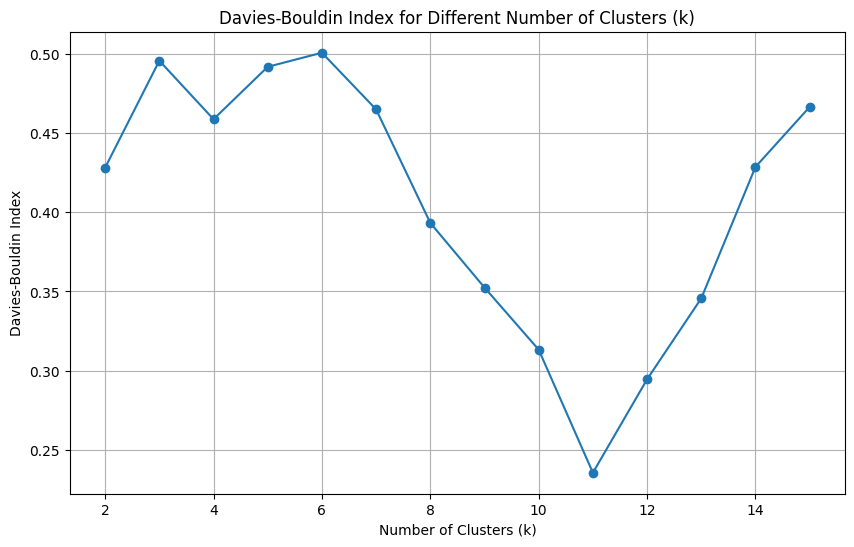

In [ ]:
from sklearn.metrics import davies_bouldin_score
# Memilih jumlah cluster yang akan diuji
k_values = list(range(2, 16))

# Memisahkan fitur untuk clustering
X = df_man[features]

# Menghitung Davies-Bouldin Index untuk setiap nilai k
db_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    db_score = davies_bouldin_score(X, labels)
    db_scores.append(db_score)

# Memvisualisasikan hasil Davies-Bouldin Index
plt.figure(figsize=(10, 6))
plt.plot(k_values, db_scores, marker='o')
plt.title('Davies-Bouldin Index for Different Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.grid(True)
plt.show()

Dari grafik diatas dapat dilihat kluster yang paling baik adalah dengan jumlah kluster sebanyak 11 kluster, karena memiliki nilai terendah diantara yang lainnya

3. Calinski-Harabasz Index:

* Mengukur seberapa baik cluster terbentuk, dengan nilai yang lebih tinggi menunjukkan clustering yang lebih baik.
* Menyajikan rasio antara dispersi antar cluster dengan dispersi dalam cluster.
* Mengukur kekompakan dan separabilitas cluster.

PROMPT ChatGPT: Beri kode untuk menghitung nilai Calinski-Harabasz Index score untuk k=2 hingga k=15

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

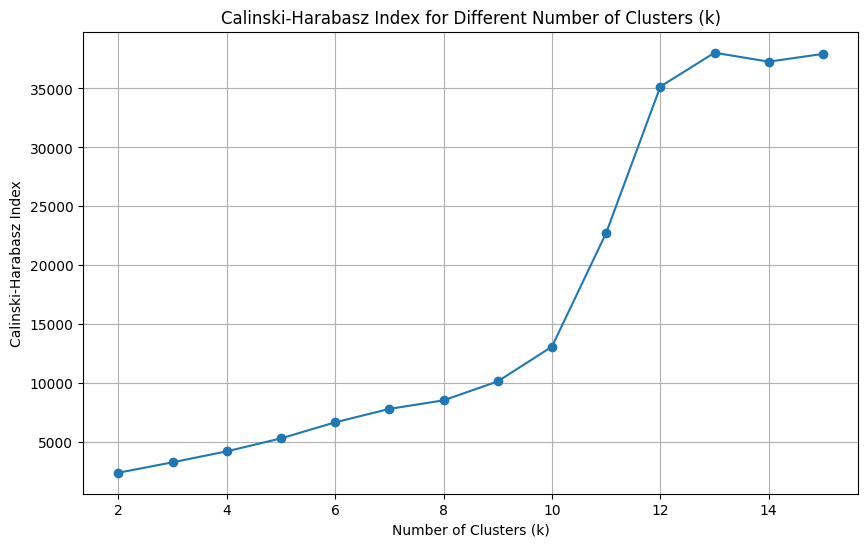

In [ ]:
from sklearn.metrics import calinski_harabasz_score
# Memilih jumlah cluster yang akan diuji
k_values = list(range(2, 16))

# Memisahkan fitur untuk clustering
X = df_man[features]

# Menghitung Calinski-Harabasz Index untuk setiap nilai k
ch_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    ch_score = calinski_harabasz_score(X, labels)
    ch_scores.append(ch_score)

# Memvisualisasikan hasil Calinski-Harabasz Index
plt.figure(figsize=(10, 6))
plt.plot(k_values, ch_scores, marker='o')
plt.title('Calinski-Harabasz Index for Different Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Index')
plt.grid(True)
plt.show()

Dari grafik diatas dapat dilihat kluster yang paling baik adalah dengan jumlah kluster sebanyak 13 kluster, karena memiliki nilai yang paling besar. Selain itu saat kluster sebanyak 14 justru mengurangi nilai yang didapatkannya

# Data Baru

berikan kode untuk memasukkan data baru ke df_man dengan "age = 25, weight_average = 65, dan height_average = 180" dan "age = 10, weight_average = 25, dan height_average = 112" dan "age = 16, weight_average = 47, dan height_average = 158"

In [ ]:
# Data baru
new_data = {'age': [25, 10, 16],
            'weight_average': [65, 25, 47],
            'height_average': [180, 112, 158]}  # Memasukkan 3 data baru pada tiap atribut

# Membuat DataFrame baru dari data baru
new_df = pd.DataFrame(new_data)

# Menambahkan DataFrame baru ke df_man
df_man = df_man.append(new_df, ignore_index=True)

# Menampilkan DataFrame yang sudah diperbarui
print(df_man)

     age  height_average  weight_average  label
0      5           111.0            19.3    1.0
1      5           111.3            19.3    1.0
2      5           111.8            19.9    1.0
3      5           111.0            19.6    1.0
4      5           111.3            19.7    1.0
..   ...             ...             ...    ...
622   17           170.4            62.2    2.0
623   17           169.5            62.8    2.0
624   25           180.0            65.0    NaN
625   10           112.0            25.0    NaN
626   16           158.0            47.0    NaN

[627 rows x 4 columns]


<ipython-input-17-15468afe5a80>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_man = df_man.append(new_df, ignore_index=True)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


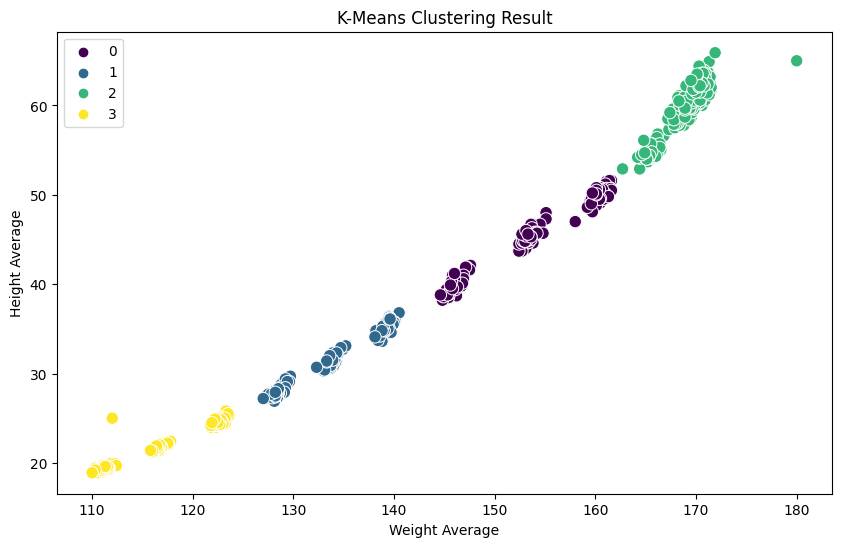

In [ ]:
# Memilih jumlah cluster
n_clusters = 4

# Memisahkan fitur untuk clustering
X = df_man[features]

# Membuat dan melatih model K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_man['label'] = kmeans.fit_predict(X)

# Memvisualisasikan hasil clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_man, x='height_average', y='weight_average', hue='label', palette='viridis', s=80)
plt.title('K-Means Clustering Result')
plt.xlabel('Weight Average')
plt.ylabel('Height Average')
plt.legend()
plt.show()

Pada data k-means cluster yang baru dapat terlihat 3 titik data baru yang pada k-means cluster sebelumnya tidak ada. 3 data tersebut berada di cluster 3, 0 dan 2

In [ ]:
print(df_man)

     age  height_average  weight_average  label
0      5           111.0            19.3      3
1      5           111.3            19.3      3
2      5           111.8            19.9      3
3      5           111.0            19.6      3
4      5           111.3            19.7      3
..   ...             ...             ...    ...
622   17           170.4            62.2      2
623   17           169.5            62.8      2
624   25           180.0            65.0      2
625   10           112.0            25.0      3
626   16           158.0            47.0      0

[627 rows x 4 columns]
